# Perceptron Lab

This is the scaffold notebook for the perceptron lab and each lab will have a similar scaffold.  Make your own copy of this notebook and then you can fill in the tasks.  **You will fill in code boxes and test boxes with discussion for most tasks** and particularly discussion of results, graphs, etc. Good writing, grammar, punctuation, etc. are important and points will be taken off if these things are lacking.

<b><u>In most cases just reporting results without discussion will not receive full credit.</u></b> Thus, your discussion should also include sentences like the following: This is because…  Note that the …  I was surprised to observe… I am not sure why …, but my hypothesis is that …

Start by looking over the scikit-learn [user guide](https://scikit-learn.org/stable/user_guide.html) and carefully reading over the [perceptron documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html).

In [ ]:
# imports
import numpy as np
from scipy.io import arff
import pandas as pd

## 1. Debug and Evaluation

For most labs we will give you some data and expected results so that you can verify that you are doing things right and getting appropriate results.  We will then have you run on some other data with the exact same hyperparameters so we can see if your results are correct.

### 1.1 Debug (5%)
Download this [data set](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/linsep2nonorigin.arff) into your local directory and name it debug.arff.  To download rather than view, right-click the link and save as.  To allow consistent results run the Perceptron using the following hyperparameters:
- Learning rate = .1
- Do NOT shuffle the data after every epoch like you would normally do
- Learn for a maximum of 10 epochs
- Start all weights at 0 (which is the default for this scikit-learn implementation)  

Your results should be:
Accuracy = [.875]\
Final Weights = [[-0.23  0.18]]\
[-0.1] - This last weight is the bias weight, which they call the intercept.

To help you with this first task, following is one detailed variation that would do this for you. You may use your own variation.  Note that commonly used variable names in the community are clf (classifier), X (array of input features), y (vector of output labels).

In [ ]:
from sklearn.linear_model import Perceptron

from google.colab import files
uploaded = files.upload() # grab file from local machine


Data_Set = arff.loadarff('debug.arff')
Data_Set_df = pd.DataFrame(Data_Set[0])
Data_Set_np = Data_Set_df.to_numpy()
Data_Set_np = Data_Set_np.astype(float)
X = Data_Set_np[:, :-1] # these are the input features
y = Data_Set_np[:, -1] # output features

clf = Perceptron(shuffle=False, verbose=0, eta0=.1) # eta0 = learning rate (c)
clf.fit(X, y)
print("Final Weights:", clf.coef_)
print("Bias (Intercept):", clf.intercept_)
print("Accuracy:", clf.score(X, y))

Saving debug.arff to debug (3).arff
Final Weights: [[-0.24  0.2 ]]
Bias (Intercept): [-0.1]
Accuracy: 1.0


Notes:
* If you increase (or just remove) max_iter your perceptron will converge to 100% in one more epoch.  Try it!
* verbose (integer) specifies how much info you get after each epoch.  It does not change results.  Try it with 0.
    * Norm is a measure of the total weight magnitudes in the current model.
    * NNZs is the number of non-zero weights there currently are (not including the bias).
    * clf.intercept_ is the value of the bias weight, NOT the actual y-intercept of the decision surface, though it will affect that.
    * T is the total number of weight updates so far.  In this case all the weights were updated each epoch.
    * Avg. loss is another measure of error.  More on that later.
    * The activation function outputs 1 if net > 0, else 0.

### 1.2 (5%) Evaluation

Now train a perceptron model  on the [banknote authentication dataset](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/data_banknote_authentication.arff) and report the final accuracy, weights, and bias. Use the exact same hyperparameters as the debug dataset. The most common reason for results not matching ours is not exactly using the same hyperparameters (e.g. initial weights, training exactly 10 epochs, no shuffling, etc.) Hint: Throughout these labs for the numerous cases where you are doing the same task, but with different data (e.g. debug, eval), you could create a function where you just pass the data set name, so as not to recreate the code multiple times.

In [ ]:
from sklearn.linear_model import Perceptron

# this is a reusable function for training the perceptron
def perceptron_train(data_set_name, max_iter = 10, shuffle = False, eta0 = .1):
  Data_Set = arff.loadarff(data_set_name)
  Data_Set_df = pd.DataFrame(Data_Set[0])
  Data_Set_np = Data_Set_df.to_numpy()
  Data_Set_np = Data_Set_np.astype(float)
  X = Data_Set_np[:, :-1] # these are the input features
  y = Data_Set_np[:, -1] # output features

  clf = Perceptron(shuffle=shuffle, max_iter=max_iter, eta0=eta0, verbose=0)
  clf.fit(X, y)


  # Extract results
  weights = clf.coef_[0]
  bias = clf.intercept_[0]
  accuracy = clf.score(X, y)

  return weights, bias, accuracy


In [ ]:
# Load evaluation data
# Train on the evaluation data
# print your accuracy and weights. Do not enter these values by hand.

from google.colab import files
uploaded = files.upload()

weights, bias, accuracy = perceptron_train('data_banknote_authentication.arff', max_iter = 10, shuffle = False, eta0 = .1)

print("Final Weights:", weights)
print("Bias (Intercept):", bias)
print("Accuracy:", accuracy)




Saving data_banknote_authentication.arff to data_banknote_authentication (6).arff
Final Weights: [-4.28857497 -2.390381   -3.0160324  -1.1686672 ]
Bias (Intercept): 5.1999999999999975
Accuracy: 0.9766763848396501


#### Discussion
Open the box below and type in your discussion.  Note that after each exercise you will have a chance to discuss your effort and results. What was your final accuracy? What was your experience running on the banknote authentication dataset?

Final Accuracy: 0.9766763848396501. Basically this means that the perceptron classified the banking notes at fake or real after 10 epochs. Overall, the experience was good because I watched a bunch of videos on ARFF format and did the reading on the perceptron. Overall, not bad (as of yet).

## 2. Classifying on linearly separable and non-linearly separable data

### 2.1 (5%) Create 2 datasets

- Both with 8 instances using 2 real valued inputs with 4 instances from each class.
- One data set should be linearly separable and the other not.
- Show or print your datasets

In [ ]:
# Create and show the 2 datasets.
# You could do it here in Python or create arff files in your local folder with a text editor.  Either way show your dataset.

from google.colab import files
uploaded = files.upload()

linearly_sepearable = arff.loadarff('linear_seperable_data_set_1.arff')

uploaded = files.upload()

not_linearly_sepearable = arff.loadarff('NOT_linear_seperable_data_set_2.arff')

print(linearly_sepearable)
print(not_linearly_sepearable)


Saving linear_seperable_data_set_1.arff to linear_seperable_data_set_1 (2).arff


Saving NOT_linear_seperable_data_set_2.arff to NOT_linear_seperable_data_set_2 (2).arff
(array([(1. , 1. , b'0'), (1.5, 1. , b'0'), (1. , 1.5, b'0'),
       (1.5, 1.5, b'0'), (5. , 5. , b'1'), (5.5, 5. , b'1'),
       (5. , 5.5, b'1'), (5.5, 5.5, b'1')],
      dtype=[('a1', '<f8'), ('a2', '<f8'), ('class', 'S1')]), Dataset: Linear
	a1's type is numeric
	a2's type is numeric
	class's type is nominal, range is ('0', '1')
)
(array([(1. , 1. , b'0'), (1.5, 1. , b'1'), (1. , 1.5, b'0'),
       (1.5, 1.5, b'1'), (5. , 5. , b'1'), (5.5, 5. , b'0'),
       (5. , 5.5, b'1'), (5.5, 5.5, b'0')],
      dtype=[('a1', '<f8'), ('a2', '<f8'), ('class', 'S1')]), Dataset: NOT
	a1's type is numeric
	a2's type is numeric
	class's type is nominal, range is ('0', '1')
)


### 2.2 (5%) Train on both sets using the scikit-learn perceptron model
- Train on each and print the results. Train until convergence (i.e. use the default max_iter by simply not specifying it).
- You may choose your other hyperparameters.

In [ ]:
# Train and print results with both datasets

print("These are the outcomes of the Linearly seperable dataset:")
weights, bias, accuracy = perceptron_train('linear_seperable_data_set_1.arff', max_iter = 10, shuffle = False, eta0 = .1)
print("Final Weights:", weights)
print("Bias (Intercept):", bias)
print("Accuracy:", accuracy)

print("\n")

print("These are the outcomes of the NOT Linearly seperable dataset:")
weights, bias, accuracy = perceptron_train('NOT_linear_seperable_data_set_2.arff', max_iter = 10, shuffle = False, eta0 = .1)
print("Final Weights:", weights)
print("Bias (Intercept):", bias)
print("Accuracy:", accuracy)

These are the outcomes of the Linearly seperable dataset:
Final Weights: [0.05 0.05]
Bias (Intercept): -0.30000000000000004
Accuracy: 1.0


These are the outcomes of the NOT Linearly seperable dataset:
Final Weights: [-0.3  -0.15]
Bias (Intercept): 0.5
Accuracy: 0.375


#### Discussion
What is different about the two runs? What makes one dataset not linearly separable? What is the result of the training? What is the accuracy of the two models?

There is a HUGE difference between the two runs. For our perceptron training model, it only works on linearly seperable data. This is because it can find a line that clearly will seperate both classes. This is clearly evident since we can get 100% accuracy on the 1st dataset and only 37.5% accuracy on dataset 2. When doing this perceptron lab (as well as the Perceptron HW 1), having a linear dataset will converge as long as it is linear. In all, with overlapping data points among both labels will make it impossible to find a line to seperate the two classes, which means the outcome wont be accurate, at all (Perceptron will do the best it can, but not good enough for non-linear seperable data).

### 2.3 (10%) Graph the datasets and their corresponding decision line

 - Graph each dataset
 - Use your trained perceptrons above to determine each dataset's decision line
    - We discssed how to find the slope and intercept in class and the equation is in the Perceptron slides
 - For all graphs always label the axes!
 - Following are examples of what graphs could look like

![Linearly Separable Data](https://raw.githubusercontent.com/rmorain/CS472-1/master/images/perceptron/linearly_separable.png)

![Not Linearly Separable](https://raw.githubusercontent.com/rmorain/CS472-1/master/images/perceptron/not_linearly_separable.png)

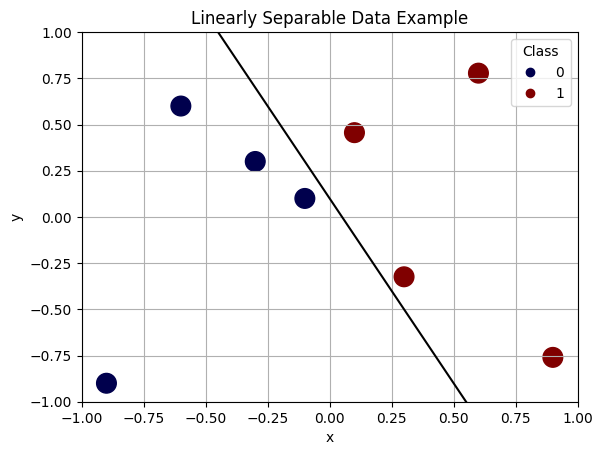

In [ ]:
# ------------------- START EXAMPLE CODE FROM PROFESSOR ------------------- #

# Sample Graph code, You can use any graphing approach you want including this one.
# We encourage you to use matplotlib.
import matplotlib.pyplot as plt

# The data in this example is made up.  You will use your real data.
data = np.array([[-.9,-.9],[-.6,.6],[-.3,.3],[-.1,.1],[.1,.456],[.3,-.324],[.6,.778],[.9,-.76]])
labels = np.array([0,0,0,0,1,1,1,1])

# Create a scatter plot of data
plt.xlim(-1,1)
plt.ylim(-1,1)
scatter = plt.scatter(data[:,0], data[:,1], c = labels, s=200, cmap='seismic')
legend = plt.legend(*scatter.legend_elements(num=1), title="Class", loc='upper right') # Legend

# Plot the learned separator.  We just made up the slope and intercept for this example. You need to calculate
# the correct slope and intercept using your learned weights and bias.
xlist = np.linspace(-1.0, 1.0, 100) # create 100 evenly spaced points between -1 and 1 for the x axis
ylist = np.linspace(-1.0, 1.0, 100) # create 100 evenly spaced points between -1 and 1 for the y axis
slope = -2  # made up
intercept = 0.1 # made up
eq = slope*xlist + intercept
plt.plot(xlist,  eq, '-k', )
plt.title('Linearly Separable Data Example')
plt.xlabel('x')
plt.ylabel('y')
plt.grid() # add grid lines
plt.show() # show the plot

# ------------------- END EXAMPLE CODE FROM PROFESSOR ------------------- #


In [ ]:
# Helper Function for datasets and decision lines for MY Linear/nonlinear cases

def plot_data_sets(file_path, weights=None, bias=None, plot_title=None):
  data_set, meta = arff.loadarff(file_path)

  data = np.array([[row[0], row[1]] for row in data_set])
  labels = np.array([int(row[2]) for row in data_set])

  # Create a scatter plot of data
  plt.xlim(0,6)
  plt.ylim(0,6)
  scatter = plt.scatter(data[:,0], data[:,1], c = labels, s=200, cmap='seismic')
  legend = plt.legend(*scatter.legend_elements(num=1), title="Class", loc='upper right') # Legend

  slope = -weights[0] / weights[1]
  intercept = -bias / weights[1]

  xlist = np.linspace(0, 6, 100)
  eq = slope*xlist + intercept
  plt.plot(xlist,  eq, '-k', )
  plt.title(plot_title)
  plt.xlabel('a1')
  plt.ylabel('a2')
  plt.grid()
  plt.show()

Saving linear_seperable_data_set_1.arff to linear_seperable_data_set_1 (10).arff
Linearly Seperable Data Set: 



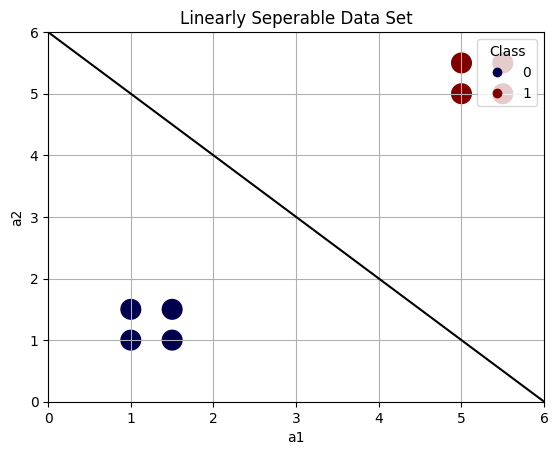

In [ ]:
# Case 1: Linear graph plot
uploaded = files.upload()
weights, bias, accuracy = perceptron_train('linear_seperable_data_set_1.arff')
plot_data_sets('linear_seperable_data_set_1.arff', weights, bias, "Linearly Seperable Data Set")


Saving NOT_linear_seperable_data_set_2.arff to NOT_linear_seperable_data_set_2 (3).arff


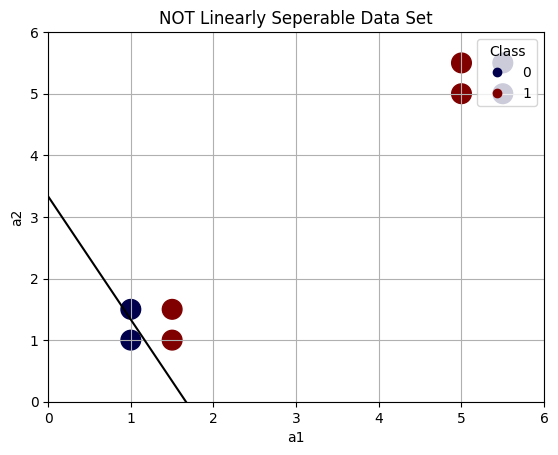

In [ ]:
# Case 2: Not Linear graph plot
uploaded = files.upload()
weights, bias, accuracy = perceptron_train('NOT_linear_seperable_data_set_2.arff')
plot_data_sets('NOT_linear_seperable_data_set_2.arff', weights, bias, "NOT Linearly Seperable Data Set")

#### Discussion
What makes a dataset not linearly separable? How is the decision line determined? slope? y-intercept?

The thing that makes a dataset not linearly sepearable is that if there are data points between the two classes that are so close next to eachother that you cannot draw a line to seperate the classes. The decision line is made by both the slope and the y-intercept.

### 2.4 (5%) Discussion - In general, why will perceptrons not get perfect accuracy on non-linearly separable data

Ultimately, the perceptron can never get perfect accuracy on non-linearly separable data because it will fail to converge. What I mean by this is that it will just keep adjusting the weights (knobs) to minimize error BUT there is not straight/single line that can seperate the classes. This means that the line will just be the best approx. the perceptron can find but it wont be really accurate at all (perceptron is very limited because of the need for linearity).

## 3. Use the perceptron to learn this version of the [voting data set](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/voting-dataset.arff)

This particular task is an edited version of the standard voting set, where we have replaced all the “don’t know” values with the most common value for the particular attribute. Look at the [tutorial](https://github.com/cs472ta/CS472/blob/master/Tutorial.ipynb) from the Labs Content page to see examples of prepping the voting data set for sklearn.

### 3.1 (10%) Average final training and test set accuracy over multiple trials

- Learn the voting data five times with different random 70/30 Training/Test splits each time
- Use a learning rate of 1.  The other hyperparameters are up to you.
- Report the 5 trials and the average training and test accuracy and number of epochs to converge across the 5 trials in a table
    - Below is an example of what a 2 trial table might look like

| Trial | Training Accuracy | Test accuracy | Number of epochs |
| --- | --- | --- | --- |
| 1 | .950 | .550 | 4 |
| 2 | .850 | .450 | 6 |
| Average | .900 | .500 | 5 |

*- As a rough sanity check, typical Perceptron test accuracies for the voting data set are 90%-98%.*


In [ ]:
from math import e
# Run the perceptron 5 times on the voting data set with different splits and record the results.
# Hint: look up scikit-learn train_test_split
# Create the table using the tool of your choice

from scipy.io import arff
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from google.colab import files

uploaded = files.upload()
voting_data = arff.loadarff('voting-dataset.arff')
voting_df = pd.DataFrame(voting_data[0])

encoder = LabelEncoder()

for col in voting_df.columns:
  voting_df[col] = encoder.fit_transform(voting_df[col]) # Turn into 1s and 0s (friendly for our model)

# voting_df.head()

x = voting_df.iloc[:, :-1] # [all rows, all columns except the last one]
y = voting_df.iloc[:, -1] # [all rows, only the final column]



def run_multiple_trials(x, y, num_of_trials=5, testing_size=0.3, learning_rate=1):
  result = []

  for trial in range(num_of_trials):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=testing_size, random_state=trial)

    clf = Perceptron(shuffle=False, verbose=0, eta0=learning_rate)
    clf.fit(x_train, y_train)

    train_accuracy = clf.score(x_train, y_train)
    test_accuracy = clf.score(x_test, y_test)
    epochs = clf.n_iter_

    result.append({
        "Trial": trial + 1,
        "Training Accuracy": train_accuracy,
        "Test Accuracy": test_accuracy,
        "Number of Epochs": epochs
    })

  return result

results = run_multiple_trials(x, y)


Saving voting-dataset.arff to voting-dataset (1).arff


In [ ]:

results_df = pd.DataFrame(results)

row = pd.DataFrame([{
    "Trial": "Average",
    "Training Accuracy": round(results_df["Training Accuracy"].mean(), 3),
    "Test Accuracy": round(results_df["Test Accuracy"].mean(), 3),
    "Number of Epochs": round(results_df["Number of Epochs"].mean(), 1)
}])

results_df = pd.concat([results_df, row], ignore_index=True)

results_df


,Trial,Training Accuracy,Test Accuracy,Number of Epochs
0,1,0.972050,0.956835,17.0
1,2,0.913043,0.906475,11.0
2,3,0.965839,0.949640,20.0
3,4,0.968944,0.964029,12.0
4,5,0.962733,0.964029,14.0
5,Average,0.957000,0.948000,14.8


### 3.2 (10%) Interpreting the Model
- Learn with the perceptron once on the full voting data set
- Look at the learned weights and bias and do your best to explain what the model has learned and how the individual input features affect the result.
- Which specific features are most critical for the voting task, and which are least critical?

In [ ]:
#Learn once on the full voting data set.  If you Look at our tutorial at the beginning

from sklearn.linear_model import Perceptron
from google.colab import files
from scipy.io import arff
import pandas as pd
from sklearn.preprocessing import LabelEncoder


uploaded = files.upload()
voting_data = arff.loadarff('voting-dataset.arff')
voting_df = pd.DataFrame(voting_data[0])

encoder = LabelEncoder()

for col in voting_df.columns:
  voting_df[col] = encoder.fit_transform(voting_df[col]) # Turn into 1s and 0s (friendly for our model)

# voting_df.head()

x = voting_df.iloc[:, :-1] # [all rows, all columns except the last one]
y = voting_df.iloc[:, -1] # [all rows, only the final column]

clf = Perceptron(shuffle=False, verbose=0, eta0=1)
clf.fit(x, y)

weights = clf.coef_[0]
bias = clf.intercept_[0]

# print("Final Weights:", weights)
# print("Bias (Intercept):", bias)

visual = pd.DataFrame({
    "Feature": voting_df.columns[:-1],
    "Weight": weights
}).sort_values(by="Weight", ascending=True)

visual


Saving voting-dataset.arff to voting-dataset (1).arff


,Feature,Weight
8,mx-missile,-9.0
10,synfuels-corporation-cutback,-9.0
2,adoption-of-the-budget-resolution,-7.0
1,water-project-cost-sharing,-3.0
14,duty-free-exports,-3.0
5,religious-groups-in-schools,-2.0
12,superfund-right-to-sue,0.0
13,crime,0.0
6,anti-satellite-test-ban,1.0
11,education-spending,1.0


### Discussion
How do the different features in the dataset effect prediction? How could you determine this?

So it is important to remember that the more positive of a weight, the model is predicting that that specific feature will predict "democrat". While if the weight is more negative that is saying that the model is predicting that specific feature will predict "republican". Since `physician-fee-freeze` is the highest value (absoluted), that means that it is the most significant in deciding which which political party.

### 3.3 (15%) Misclassification rate vs epochs

Learn with the perceptron once on the full voting data set and graph the misclassification rate (number_misclassified  /  number_of_total_data_points) at each epoch until convergence (0th – final epoch).  Hints:
- For the 0th epoch (i.e. initial weights), assume the initial misclassification rate is 50% and let that be the first point on your graph. Since there are 2 output classes, random guessing would only get it right about 1/2 of the time. Missclassifcation rate is 1 - accuracy.
- Doing clf.fit with max_iter = 1, and warm_start=True will let you loop through epochs one at a time, allowing you to look at accuracy, etc. after each epoch.  But how do you know how many epochs to run until convergence?  One way is to just to first run it until convergence with random_state = c to see how many epochs it took (n_iter_).  Then run it again one epoch at a time n_iter_ times using the same random_state constant c (so that you get the exact same conditions).
- Below is a rough example of what this type of graph might look like (though this graph is for avg rate across multiple trials)

![Average Misclassification Rate](https://raw.githubusercontent.com/rmorain/CS472-1/master/images/perceptron/avg_misclassification_rate_vs_epochs.png)

Saving voting-dataset.arff to voting-dataset (11).arff


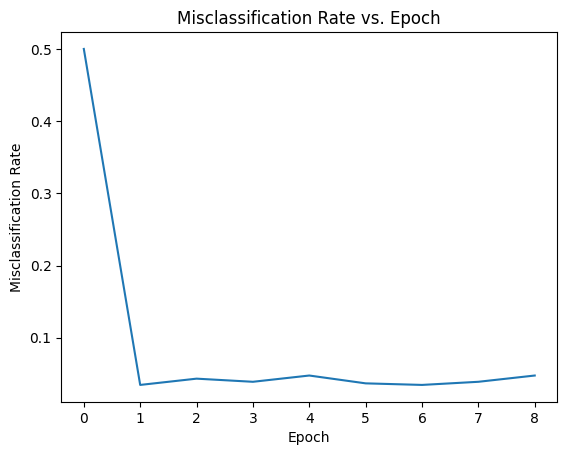

In [ ]:
# Learn once on the full voting data set, while gathering info after every epoch
# Then Graph it here.  Here is some sample graph code, but you can do it your own way, including using a bar graph, etc.

from sklearn.linear_model import Perceptron
from google.colab import files
from scipy.io import arff
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt

def plot_misclassification(misclassification_rate):
    """
        Plots the misclassification rate
    Args:
        misclassification_rate (array-like): A 1D array or list of missclassifcation rate at every epoch
    """

    plt.plot(np.arange(len(misclassification_rate)), misclassification_rate)
    plt.title("Misclassification Rate vs. Epoch")
    plt.xlabel("Epoch")
    plt.ylabel("Misclassification Rate")
    plt.show()


uploaded = files.upload()
voting_data = arff.loadarff('voting-dataset.arff')
voting_df = pd.DataFrame(voting_data[0])

encoder = LabelEncoder()
misclassification_rate = [0.5]

for col in voting_df.columns:
  voting_df[col] = encoder.fit_transform(voting_df[col]) # Turn into 1s and 0s (friendly for our model)


x = voting_df.iloc[:, :-1] # [all rows, all columns except the last one]
y = voting_df.iloc[:, -1] # [all rows, only the final column]

clf = Perceptron(shuffle=False, verbose=0, eta0=0.1, random_state=42, warm_start=True)
clf.fit(x, y)
num_of_epochs = clf.n_iter_

clf = Perceptron(shuffle=False, verbose=0, eta0=0.1, random_state=42, warm_start=True)


for epoch in range(num_of_epochs):
  clf.fit(x, y)
  accuracy = clf.score(x, y)
  misclassification_rate.append(1 - accuracy)

plot_misclassification(misclassification_rate)


#### Discussion
Discuss the results in your graph. How quickly does the perceptron converge? Do you think this is typical? Are there any anomalies or anything you didn't expect?

It converges pretty fast (more fast than I thought). It converges about just after 1 epoch. I do think that this is very unusual because there are very large datasets and I expect convergence in later epochs.

### 3.4 (15%) Hyperparameters
Read over all the Hyperparameters and their defaults in the scikit [perceptron documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html). With the voting data set, experiment briefly with EACH of the following 6 hyperparameters and discuss your findings.
- shuffle
- eta0 - learning rate
- verbose
- fit_intercept - whether to use a bias weight or not
- random state
- warm start

Aaron Notes:
- Shuffle (boolean) - Tells us whether or not the training data is to be shuffled or not after each epoch
- eta0 (int (default=0)) - learning rate
- verbose (int (default=0)) - verbosity level - controls how much information the algorithm prints out while it is running. (0 = silent mode, 1 = basic progresses, 2 or higher = more detailed messages)
- fit_intercept (boolean) - tells whether the model should calculate and include an intercept (bias term) in the model
- random state (int, RandomState instance or None, default=0) - Used to shuffle the training data, when shuffle is set to True. Pass an int for reproducible output across multiple function calls
- warm start (bool, default=False) - When set to True, reuse the solution of the previous call to fit as initialization, otherwise, just erase the previous solution.

In [ ]:
# Run the model with different hyperparameters
#Learn once on the full voting data set.  If you Look at our tutorial at the beginning

from sklearn.linear_model import Perceptron
from google.colab import files
from scipy.io import arff
import pandas as pd
from sklearn.preprocessing import LabelEncoder


uploaded = files.upload()
voting_data = arff.loadarff('voting-dataset.arff')
voting_df = pd.DataFrame(voting_data[0])

encoder = LabelEncoder()

for col in voting_df.columns:
  voting_df[col] = encoder.fit_transform(voting_df[col]) # Turn into 1s and 0s (friendly for our model)

# voting_df.head()

x = voting_df.iloc[:, :-1] # [all rows, all columns except the last one]
y = voting_df.iloc[:, -1] # [all rows, only the final column]

# clf = Perceptron(shuffle=False, verbose=1, eta0=1)
# clf = Perceptron(shuffle=False, verbose=1, eta0=0.5) # this is lowering the lr by half (halfed the output weights)
# clf = Perceptron(shuffle=True, verbose=1, eta0=1, fit_intercept=False)
# clf = Perceptron(shuffle=True, verbose=1, eta0=1, random_state=40)
# clf = Perceptron(shuffle=False, verbose=1, eta0=1, warm_start=True)
clf = Perceptron(shuffle=False, verbose=1, eta0=1, shuffled=False)


clf.fit(x, y)

weights = clf.coef_[0]
bias = clf.intercept_[0]

# print("Final Weights:", weights)
# print("Bias (Intercept):", bias)

visual = pd.DataFrame({
    "Feature": voting_df.columns[:-1],
    "Weight": weights
}).sort_values(by="Weight", ascending=True)

visual



Saving voting-dataset.arff to voting-dataset (25).arff
-- Epoch 1
Norm: 26.91, NNZs: 13, Bias: -10.000000, T: 461, Avg. loss: 0.219089
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 27.31, NNZs: 15, Bias: -11.000000, T: 922, Avg. loss: 0.188720
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 27.35, NNZs: 15, Bias: -12.000000, T: 1383, Avg. loss: 0.264642
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 28.34, NNZs: 14, Bias: -11.000000, T: 1844, Avg. loss: 0.225597
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 28.65, NNZs: 13, Bias: -11.000000, T: 2305, Avg. loss: 0.232104
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 29.02, NNZs: 12, Bias: -11.000000, T: 2766, Avg. loss: 0.201735
Total training time: 0.01 seconds.
-- Epoch 7
Norm: 29.00, NNZs: 15, Bias: -11.000000, T: 3227, Avg. loss: 0.238612
Total training time: 0.01 seconds.
Convergence after 7 epochs took 0.01 seconds


,Feature,Weight
10,synfuels-corporation-cutback,-12.0
8,mx-missile,-9.0
2,adoption-of-the-budget-resolution,-6.0
14,duty-free-exports,-3.0
1,water-project-cost-sharing,-2.0
5,religious-groups-in-schools,-1.0
13,crime,0.0
0,handicapped-infants,1.0
12,superfund-right-to-sue,1.0
4,el-salvador-aid,2.0


#### Discussion
Discuss your findings from the experimentation with the hyperparameters.

What I learned from playing around with hyperparams:

- Shuffle (boolean) - This is by default: True, so when I changed it to False, I found it would mess around with all the weights and put different attributes in order.


- eta0 (int (default=0)) - I found that if I would decrease my learning rate by half (Went from 1 -> 0.5) all of my outputted weights would also be halfed. that makes sense to me considering the perceptron formula.


- verbose (int (default=0)) - I found that if I set this to zero there was no output when I was running my epochs. When I would increase the verbose to verbose=1, then I would see additional and helpful details. For instance, I was seeing, for each Epoch, I would see the Norm, NNZs, Bias, Avg. loss, Training time. I could see this being helpful in the future, especially with larger data.


- fit_intercept (boolean) - The thing that I found is that it would mess around with all the weights and put different attributes in order.


- random state (int, RandomState instance or None, default=0) - if i keep this the name number (for ex: 40) it will have the exact same results over and over again.


- warm start (bool, default=False) - Honestly, I didn't see anything when I changed the value to true.

## 4. (10%) Use the perceptron to learn one other data set of your choice.  
- The UC Irvine Data Repository is one great source, but you may get your data set from wherever you like, though it should be a real world task.
- Report your results

In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo
from sklearn.impute import SimpleImputer


# fetch dataset
breast_cancer_wisconsin_original = fetch_ucirepo(id=15)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_original.data.features
y = breast_cancer_wisconsin_original.data.targets

# metadata
# print(breast_cancer_wisconsin_original.metadata)

# variable information
# print(breast_cancer_wisconsin_original.variables)

# print(X.columns)

imputer = SimpleImputer(strategy='median') # this is needed to replace NaN
X = imputer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=37)

clf = Perceptron(shuffle=False, verbose=0, eta0=1)
clf.fit(X_train, y_train)

train_accuracy = clf.score(X_train, y_train)
test_accuracy = clf.score(X_test, y_test)
epochs = clf.n_iter_

print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("Number of Epochs:", epochs)

Training Accuracy: 0.9120654396728016
Test Accuracy: 0.9333333333333333
Number of Epochs: 12


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### Discussion
Discuss how the perceptron did on the data set and why you think it performed as such.

The perceptron did very well for this dataset (I chose this dataset on purpose as I had a prediction that it would do well). After 12 epochs the perceptron had a training accuracy of about 91.2% and a test accuracy of about 93.3%. This means that the data was fairly linearly seperable between both classes: benign or malignat. Note: it was also critical to clean the data (NaN rows) so that the model could actually work.

## 5. (5%) Code up your own perceptron learner

Actually coding a model leads to better understanding of what is really happening "under the hood."  Below is a scaffold you could use if you want. Requirements for this task:
- Your perceptron should support the methods shown in the example scaffold below.
- Your output node should output 1 if net is > 0, else 0.
- Use Stochastic/On-line training updates: Iterate and update weights after each training instance (i.e. not batch updates)
- Implement a stopping criteria: when your model has trained for a number of epochs with no improvement in accuracy, stop training. Note that the weights/accuracy do not usually change monotonically.
- Your class can inherit from the relevant scikit-learn learners (e.g. data shuffling, etc.), but don't call any of the super methods to accomplish the core methods in the scaffold.
- Run the evaluation data set and the voting data set above with your Perceptron version. Show and discuss your results and how they compare with the scikit-learn version.

In [ ]:
# Optional scaffold for Perceptron code.  IF you use this feel free to change/add any methods you want.

from sklearn.base import BaseEstimator, ClassifierMixin
class PerceptronClassifier(BaseEstimator,ClassifierMixin):

    def __init__(self, lr=.1, shuffle=True):
        """
            Initialize class with chosen hyperparameters.
        Args:
            lr (float): A learning rate / step size.
            shuffle: Whether to shuffle the training data each epoch. DO NOT
            SHUFFLE for evaluation / debug datasets.
        """
        self.lr = lr
        self.shuffle = shuffle

    def fit(self, X, y, initial_weights=None):
        """
            Fit the data; run the algorithm and adjust the weights to find a
            good solution
        Args:
            X (array-like): A 2D numpy array with the training data, excluding
            targets
            y (array-like): A 2D numpy array with the training targets
            initial_weights (array-like): allows the user to provide initial
            weights
        Returns:
            self: this allows this to be chained, e.g. model.fit(X,y).predict(X_test)
        """
        self.weights = self.initialize_weights() if not initial_weights else initial_weights

        return self

    def predict(self, X):
        """
            Predict all classes for a dataset X
        Args:
            X (array-like): A 2D numpy array with the training data, excluding
            targets
        Returns:
            array, shape (n_samples,)
                Predicted target values per element in X.
        """
        pass

    def initialize_weights(self):
        """ Initialize weights for perceptron. Don't forget the bias!
        Returns:
        """

        return [0]

    def score(self, X, y):
        """
            Return accuracy of model on a given dataset. Must implement own
            score function.
        Args:
            X (array-like): A 2D numpy array with data, excluding targets
            y (array-like): A 2D numpy array with targets
        Returns:
            score : float
                Mean accuracy of self.predict(X) wrt. y.
        """

        return 0

    ### Returns the weights and bias. Not required but great for debugging.
    def get_weights(self):
        pass